In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# libraries
import pandas as pd
from pandas import DataFrame
import seaborn as sns
import numpy as np
from scipy.stats import boxcox
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.metrics import silhouette_score
from sklearn.metrics import pairwise_distances
from sklearn.metrics import davies_bouldin_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import plotly.express as px #grafico interattivo
import plotly.graph_objects as go
import plotly.colors as colors

# Clustering on %, raw data




In [3]:
# Importing datset
variance_df=pd.read_csv('/content/drive/MyDrive/DS LAB - Colombaro, Ferretti, Fracchia, Salvatori/PROCESSED DATASETS/Happiness + Freedom/variance_df.csv')
variance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 18 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Country name                               158 non-null    object 
 1   PR % change                                155 non-null    float64
 2   CL % change                                158 non-null    float64
 3   A % change                                 156 non-null    float64
 4   B % change                                 156 non-null    float64
 5   C % change                                 156 non-null    float64
 6   D % change                                 157 non-null    float64
 7   E % change                                 156 non-null    float64
 8   F % change                                 157 non-null    float64
 9   G % change                                 158 non-null    float64
 10  Total % change            

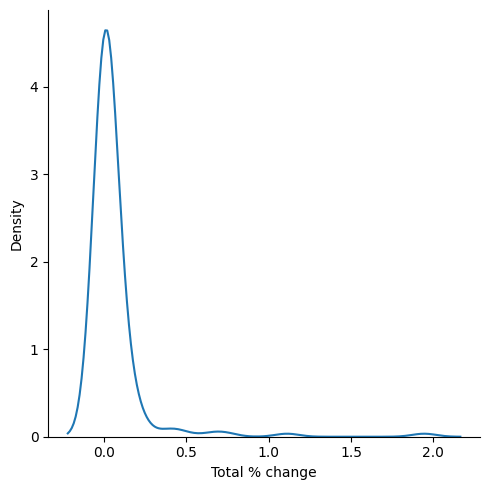

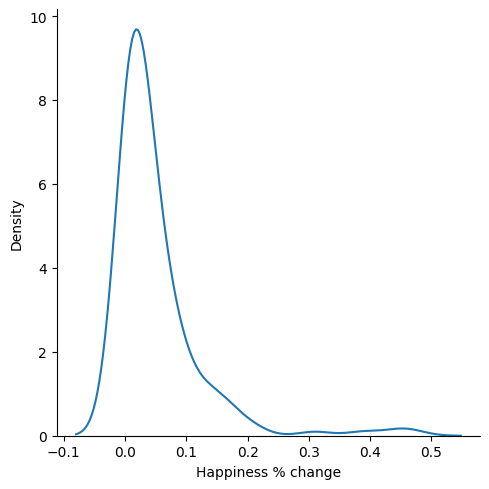

In [4]:
# Distributions
sns.displot(variance_df, x="Total % change", kind="kde") #right assimetry


sns.displot(variance_df, x="Happiness % change", kind="kde") #right assimetry

In [5]:
# Columns of interest
variance_df_subset=variance_df[['Country name', 'Total % change', 'Happiness % change' ]]
variance_df_subset.set_index('Country name', inplace=True)

In [6]:
#Normalizing data
variance_df_subset = normalize(variance_df_subset)

# Converting the numpy array into a pandas DataFrame
variance_df_subset = pd.DataFrame(variance_df_subset)

In [7]:
# Renaming columns
variance_df_subset.rename(columns = {0:'Total % change', 1:'Happiness % change'}, inplace = True)
variance_df_subset


,Total % change,Happiness % change
0,0.660810,0.750553
1,0.256096,0.966651
2,0.149285,0.988794
3,0.648058,0.761591
4,0.151490,0.988459
...,...,...
153,0.612857,0.790194
154,0.259111,0.965848
155,0.470836,0.882221
156,0.020574,0.999788


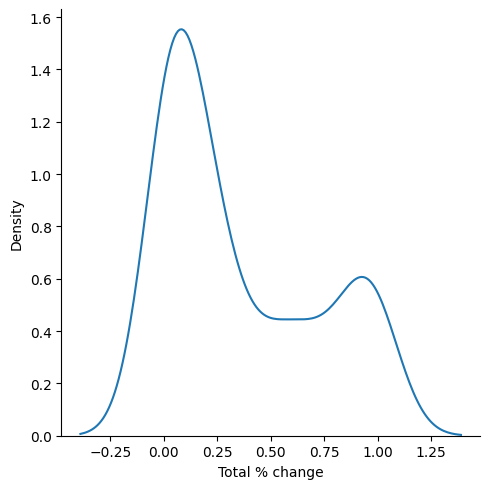

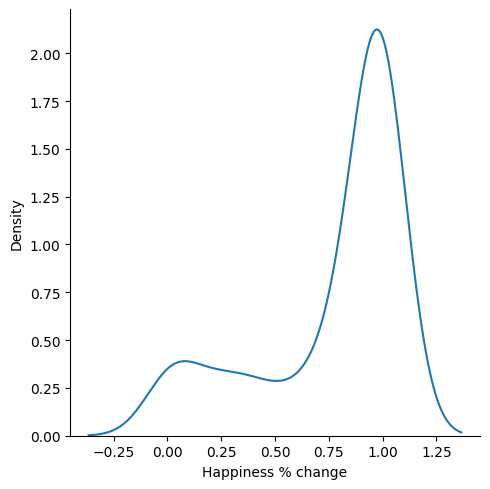

In [8]:
# Normalized distributions
sns.displot(variance_df_subset, x="Total % change", kind="kde")


sns.displot(variance_df_subset, x="Happiness % change", kind="kde")

In [9]:

# Standardization

num_col = ['Total % change','Happiness % change']
scaler = StandardScaler()
for i in num_col:
  variance_df_subset[[i]] = scaler.fit_transform(variance_df_subset[[i]])


In [10]:
# Descriptive statistics
variance_df_subset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Total % change,158.0,-1.405346e-16,1.00318,-0.992529,-0.858796,-0.425882,0.843299,1.817197
Happiness % change,158.0,-1.124276e-17,1.00318,-2.300095,-0.350230,0.601155,0.683421,0.688566


In [11]:
# covariance matrix
variance_df_subset.cov()


,Total % change,Happiness % change
Total % change,1.006369,-0.684087
Happiness % change,-0.684087,1.006369


In [12]:
# correlation matrix
variance_df_subset.corr()

,Total % change,Happiness % change
Total % change,1.000000,-0.679757
Happiness % change,-0.679757,1.000000


In [13]:
# Model
gm = GaussianMixture(n_components=5,
                     covariance_type='full',
                     tol=0.0001,
                     reg_covar=1e-06,
                     max_iter=100,
                     n_init=50,
                     init_params='kmeans',
                     weights_init=None,
                     means_init=None,
                     precisions_init=None,
                     random_state=123,
                     warm_start=False,
                     verbose=0,
                     verbose_interval=10).fit(variance_df_subset)


gm.get_params()

{'covariance_type': 'full',
 'init_params': 'kmeans',
 'max_iter': 100,
 'means_init': None,
 'n_components': 5,
 'n_init': 50,
 'precisions_init': None,
 'random_state': 123,
 'reg_covar': 1e-06,
 'tol': 0.0001,
 'verbose': 0,
 'verbose_interval': 10,
 'warm_start': False,
 'weights_init': None}

In [14]:
# centroids for each cluster
centers = gm.means_
print(centers)

[[-0.32730667  0.59750304]
 [ 1.70396382 -1.60422858]
 [-0.99252939 -2.30009463]
 [-0.84671398  0.68220579]
 [ 0.76248763 -0.01321191]]


In [15]:
# labels
pred = gm.predict(variance_df_subset)
pred

array([4, 0, 0, 4, 0, 4, 4, 3, 1, 1, 0, 1, 0, 2, 0, 1, 4, 0, 3, 0, 3, 4,
       2, 4, 4, 3, 1, 0, 0, 1, 3, 0, 4, 1, 3, 1, 3, 3, 3, 3, 3, 4, 4, 0,
       3, 3, 1, 3, 4, 1, 0, 3, 3, 3, 0, 0, 3, 0, 1, 4, 1, 3, 3, 4, 1, 3,
       3, 3, 3, 4, 0, 4, 3, 4, 4, 4, 1, 3, 3, 1, 3, 1, 3, 3, 1, 3, 4, 2,
       1, 0, 0, 3, 3, 4, 3, 0, 3, 3, 4, 3, 3, 3, 0, 1, 3, 3, 4, 3, 0, 3,
       3, 3, 3, 0, 3, 2, 3, 4, 0, 1, 3, 0, 3, 3, 3, 0, 3, 3, 0, 1, 0, 3,
       2, 3, 3, 2, 3, 1, 4, 1, 1, 3, 2, 4, 1, 1, 0, 0, 1, 3, 4, 3, 1, 4,
       0, 4, 3, 0])

In [16]:
variance_df_subset['Cluster']=pred

#f_2013_subset.reset_index(inplace=True)
variance_df_subset['Total']= variance_df['Total % change']
variance_df_subset['Happiness']= variance_df['Happiness % change']

variance_df_subset['Country name'] = variance_df['Country name']


In [17]:
# scatterplot

fig = px.scatter(variance_df_subset, x=variance_df_subset['Total % change'], y=variance_df_subset['Happiness % change'], hover_data=variance_df_subset[['Total','Happiness','Country name', 'Cluster']], color="Cluster")


fig.update_layout(
    title='Perchentage change Clustering',
    xaxis_title='Total percentage change',
    yaxis_title='Happiness percentage change'
)


fig.show()

In [18]:
# coropleth map of clusters
fig = go.Figure(
    go.Choropleth(
        locations=variance_df_subset["Country name"],
        z=variance_df_subset['Cluster'],
        locationmode='country names',
        colorscale= 'matter',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2, 3, 4],
            ticktext=["0", "1", "2", "3", "4"]
        )
        )
    )
fig.show()

In [19]:
variance_df_subset['Overall_change']= variance_df_subset['Total % change']+variance_df_subset['Happiness % change']
variance_df_subset.sort_values(by=['Overall_change'], ascending=True, inplace=True)
variance_df_subset

,Total % change,Happiness % change,Cluster,Total,Happiness,Country name,Overall_change
115,-0.992529,-2.300095,2,0.000000,0.000000,Qatar,-3.292624
135,-0.992529,-2.300095,2,0.000000,0.000000,Syria,-3.292624
132,-0.992529,-2.300095,2,0.000000,0.000000,Sudan,-3.292624
13,-0.992529,-2.300095,2,0.000000,0.000000,Belize,-3.292624
22,-0.992529,-2.300095,2,0.000000,0.000000,Burundi,-3.292624
...,...,...,...,...,...,...,...
71,0.848277,-0.042151,4,0.012090,0.013942,Kazakhstan,0.806127
48,0.858885,-0.051985,4,0.002017,0.002303,France,0.806901
0,0.864196,-0.056945,4,0.412146,0.468119,Afghanistan,0.807250
24,0.908645,-0.099473,4,0.049788,0.054180,Cameroon,0.809172


In [20]:
variance_df_subset[variance_df_subset['Cluster']==4]


,Total % change,Happiness % change,Cluster,Total,Happiness,Country name,Overall_change
59,0.273886,0.367782,4,0.011175,0.022133,Hungary,0.641668
93,0.289732,0.359205,4,0.008274,0.016132,Moldova,0.648937
23,0.308901,0.348649,4,0.026215,0.050161,Cambodia,0.657549
155,0.330412,0.336564,4,0.165392,0.309900,Yemen,0.666976
5,0.380226,0.307595,4,0.023685,0.042299,Armenia,0.687821
86,1.357244,-0.661433,4,0.025454,0.016688,Malaysia,0.695812
41,0.407201,0.291320,4,0.012216,0.021262,Ecuador,0.698521
74,1.345173,-0.642014,4,0.005740,0.003827,Kuwait,0.703159
63,0.459040,0.258850,4,0.029538,0.048955,Iran,0.717891
106,0.463458,0.256009,4,0.014105,0.023280,North Macedonia,0.719467


In [21]:
# Dropping columns not used in the model
variance_df_subset.drop(['Cluster', 'Total', 'Happiness', 'Country name'], axis=1, inplace=True)
variance_df_subset


,Total % change,Happiness % change,Overall_change
115,-0.992529,-2.300095,-3.292624
135,-0.992529,-2.300095,-3.292624
132,-0.992529,-2.300095,-3.292624
13,-0.992529,-2.300095,-3.292624
22,-0.992529,-2.300095,-3.292624
...,...,...,...
71,0.848277,-0.042151,0.806127
48,0.858885,-0.051985,0.806901
0,0.864196,-0.056945,0.807250
24,0.908645,-0.099473,0.809172


Text(0, 0.5, 'Score')

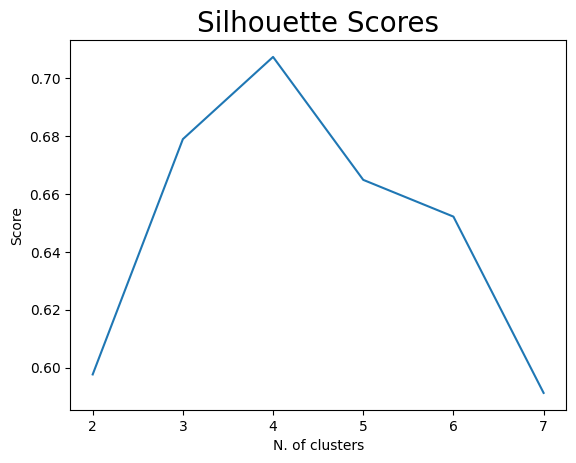

In [22]:
# Silhouette coefficient
def SelBest(arr:list, X:int)->list:
    '''
    returns the set of X configurations with shorter distance
    '''
    dx=np.argsort(arr)[:X]
    return arr[dx]

n_clusters=np.arange(2, 8)
sils=[]
sils_err=[]
iterations=20
for n in n_clusters:
    tmp_sil=[]
    for _ in range(iterations):
        gm=GaussianMixture(n, n_init=2, covariance_type='full', init_params='kmeans', random_state=123).fit(variance_df_subset)
        labels=gm.predict(variance_df_subset)
        sil=metrics.silhouette_score(variance_df_subset, labels, metric='euclidean')
        tmp_sil.append(sil)
    val=np.mean(SelBest(np.array(tmp_sil), int(iterations/5)))
    err=np.std(tmp_sil)
    sils.append(val)
    sils_err.append(err)

plt.errorbar(n_clusters, sils, yerr=sils_err)
plt.title("Silhouette Scores", fontsize=20)
plt.xticks(n_clusters)
plt.xlabel("N. of clusters")
plt.ylabel("Score")

#Number of components(k) selection:
# Silhouette score checks how much the clusters are compact and well separated.
# The more the score is near to one, the better the clustering is.
# Since we already know that the fitting procedure is not deterministic,
# we run twenty fits for each number of clusters, then we consider the mean value and the standard deviation of the best five runs.

# Silhouette Scores reflect that the best number of clusters is 3: we will see later if also AIC and BIC indices confirm this suggestion.

In [23]:
# Internal evaluation measures

# silhouette coefficient: [-1,+1], how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

data_subset = variance_df_subset[['Total % change','Happiness % change']]
silhouette = silhouette_score(data_subset, pred)
print(f'Silhouette Score: {silhouette}')



# calinski_harabasz: ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters
# (where the dispersion is the sum of squared distances). Higher values mean good clustering.

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred)
print(f'Calinski Harabasz Score: {calinski_harabasz}')


# davies bouldin: Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation,
#a lower value will mean that the clustering is better. It is a symmetric and non negative index

davies_bouldin = davies_bouldin_score(data_subset, pred)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: -0.16521936115784353
Calinski Harabasz Score: 1.54892904476775
Davies Bouldin Score: 11.13559552655467


In [24]:
# Aic and Bic to determine the best fit
n_c = [2, 3, 4, 5, 6, 7]
aic = []
bic = []

for i in n_c:
  gm = GaussianMixture(n_components=i, random_state=123)
  gm.fit(data_subset)
  aic.append(round(gm.aic(data_subset)))
  bic.append(round(gm.bic(data_subset)))

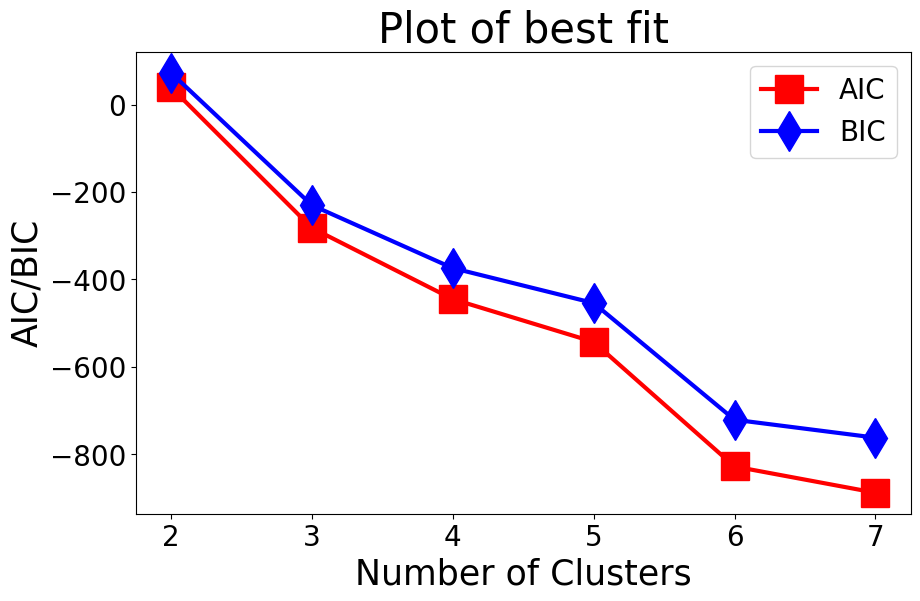

In [25]:
plt.figure(figsize=(10,6))
plt.plot(n_c, aic, color='r', linewidth=3, marker='s', markersize=20, label='AIC')
plt.plot(n_c, bic, color='b', linewidth=3, marker='d', markersize=20, label='BIC')
plt.ylabel('AIC/BIC', fontsize=25)
plt.xlabel('Number of Clusters', fontsize=25)
plt.title('Plot of best fit', fontsize=30)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.legend(fontsize=20)

In [26]:
# absolute value
print(aic)
print(bic)

[40, -282, -445, -543, -828, -888]
[73, -230, -374, -454, -721, -762]


Looking at silhouette coefficient the best number of cluster should be 4. In this way we improve results.

In [27]:
variance_df_subset

,Total % change,Happiness % change,Overall_change
115,-0.992529,-2.300095,-3.292624
135,-0.992529,-2.300095,-3.292624
132,-0.992529,-2.300095,-3.292624
13,-0.992529,-2.300095,-3.292624
22,-0.992529,-2.300095,-3.292624
...,...,...,...
71,0.848277,-0.042151,0.806127
48,0.858885,-0.051985,0.806901
0,0.864196,-0.056945,0.807250
24,0.908645,-0.099473,0.809172


In [28]:
# 4 components
gm_4 = GaussianMixture(n_components=4,
                     covariance_type='full',
                     tol=0.0001,
                     reg_covar=1e-06,
                     max_iter=100,
                     n_init=50,
                     init_params='kmeans',
                     weights_init=None,
                     means_init=None,
                     precisions_init=None,
                     random_state=123,
                     warm_start=False,
                     verbose=0,
                     verbose_interval=10).fit(variance_df_subset)


pred_4 = gm_4.predict(variance_df_subset)
pred_4

array([2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3])

In [29]:
variance_df_subset['Cluster']=pred_4

#f_2013_subset.reset_index(inplace=True)
variance_df_subset['Total']= variance_df['Total % change']
variance_df_subset['Happiness']= variance_df['Happiness % change']

variance_df_subset['Country name'] = variance_df['Country name']


In [30]:
# scatterplot
#
fig = px.scatter(variance_df_subset, x=variance_df_subset['Total % change'], y=variance_df_subset['Happiness % change'], hover_data=variance_df_subset[['Total','Happiness','Country name', 'Cluster']], color="Cluster")


fig.update_layout(
    title='Perchentage change Clustering',
    xaxis_title='Total percentage change',
    yaxis_title='Happiness percentage change'
)


fig.show()

In [31]:
# coropleth map
fig = go.Figure(
    go.Choropleth(
        locations=variance_df_subset["Country name"],
        z=variance_df_subset['Cluster'],
        locationmode='country names',
        colorscale= 'matter',
        autocolorscale=False,
        marker_line_color="white",
        marker_line_width=0.5,
        colorbar=dict(
            tickvals=[0, 1, 2, 3],
            ticktext=["0", "1", "2", "3"]
        )
        )
    )
fig.show()

In [32]:
# Internal evaluation measures

# silhouette coefficient: [-1,+1], how similar an object is to its own cluster (cohesion) compared to other clusters (separation).
#The silhouette ranges from −1 to +1, where a high value indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters

data_subset = variance_df_subset[['Total % change','Happiness % change']]
silhouette = silhouette_score(data_subset, pred_4)
print(f'Silhouette Score: {silhouette}')



# calinski_harabasz: ratio of the sum of inter-cluster dispersion and the sum of intra-cluster dispersion for all clusters
# (where the dispersion is the sum of squared distances). Higher values mean good clustering.

calinski_harabasz= metrics.calinski_harabasz_score(data_subset, pred_4)
print(f'Calinski Harabasz Score: {calinski_harabasz}')


# davies bouldin: Due to the way it is defined, as a function of the ratio of the within cluster scatter, to the between cluster separation,
#a lower value will mean that the clustering is better. It is a symmetric and non negative index

davies_bouldin = davies_bouldin_score(data_subset, pred_4)
print(f'Davies Bouldin Score: {davies_bouldin}')

Silhouette Score: 0.7326614739516947
Calinski Harabasz Score: 772.661964782912
Davies Bouldin Score: 0.34703966761320326


In [33]:
variance_df_subset[(variance_df_subset['Country name']=='Algeria')|(variance_df_subset['Country name']=='Angola')]

,Total % change,Happiness % change,Overall_change,Cluster,Total,Happiness,Country name
2,-0.573071,0.655076,0.082004,1,0.004277,0.028326,Algeria
3,0.828366,-0.023957,0.804408,3,0.001111,0.001306,Angola
